### Introduction to KNearest neighbour algorithm

- K-nearest neighbors (KNN) is a type of supervised learning algorithm in Machine Learning,used for both regression and classification,as it can be used for both classification and regression problems,more commonly used on classification problems.
- Noting can be done in the phase of training in knn,Only model stores the training data
- At the time of testing knn finds the distances
- Knn also called as lazy algorithm

#### Intution behind the KNN
- let us understand the intution of KNN algorithm with the help of iris data ,it is a classification problem with the help of two features sepal width and sepal length have to predict the class of the flower by sepal width and sepal length.
- We need to predict the class of test_point using knn algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X_class = iris.data[:, :2]   # sepal length, sepal width
y_class = iris.target

# Keep only class 0 and 1
mask = y_class < 2
X_class = X_class[mask]
y_class = y_class[mask]

print("Shape of X:", X_class.shape)
print("Class distribution:", np.bincount(y_class))

df = pd.DataFrame(X_class, columns=["Sepal Length", "Sepal Width"])
df["target"] = y_class
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [4]:
test_point = np.array([[6.8, 3.7]])

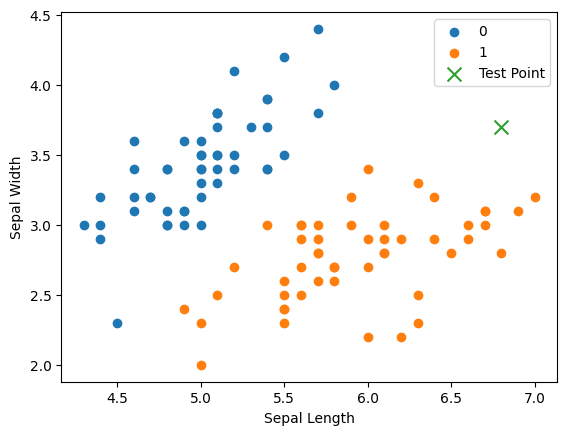

In [5]:
for label in np.unique(y_class):
    mask = y_class == label
    plt.scatter(X_class[mask, 0], X_class[mask, 1], label=label)
plt.scatter(
    test_point[0, 0],
    test_point[0, 1],
    marker='x',
    s=100,
    label='Test Point'
)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()


### How does the knn works?

- To predict the class of the test_point ,we have to find the distances from test_point to all train data points.
- Perform feature scalling on the numerical features,Here in our example all the features are within small ranges no need of feature scalling.
- Based on the similarity ,k nearest neighbours are selected from the test_point.
- If it is a classification problem mode of the k nearest neighbours is assigned to test_point.
- If it is a Regression problem mean of the k nearest neighbours is assigned to test_point.

### How to calculate distance between points  
- There are various methods for calculating the distance between the points.
1. **Euclidean distance** : line joining the two points ,shortest distance between the two data points.
  - Euclidean distance is calculated as the square root of the sum of the squared differences between a new point (x) and an existing point (y).
  - Incase of higher dimensional space eclidean distance is meaningless.

2.  **Manhattan distance** : It is the sum of absolute differences of the correspoding coordinates.
  - Effective when calculating similarity incase of high dimensional space

3. **Minkowiski distance**: It is a generated metrics,it also can be either euclidean or manhattan or any dericed metric to calculate the distance between the two data points

In [6]:
from sklearn.metrics import euclidean_distances

distances = euclidean_distances(test_point,X_class)
distances

array([[1.71172428, 2.02484567, 2.15870331, 2.28035085, 1.80277564,
        1.41421356, 2.22036033, 1.82482876, 2.52982213, 1.99248588,
        1.4       , 2.02237484, 2.11896201, 2.596151  , 1.04403065,
        1.30384048, 1.41421356, 1.71172428, 1.1045361 , 1.70293864,
        1.43178211, 1.7       , 2.20227155, 1.74642492, 2.02237484,
        1.93132079, 1.82482876, 1.61245155, 1.62788206, 2.15870331,
        2.0880613 , 1.43178211, 1.64924225, 1.39283883, 1.99248588,
        1.86815417, 1.31529464, 1.90262976, 2.5       , 1.72626765,
        1.81107703, 2.6925824 , 2.45153013, 1.81107703, 1.70293864,
        2.11896201, 1.70293864, 2.25610283, 1.5       , 1.84390889,
        0.53851648, 0.64031242, 0.60827625, 1.91049732, 0.9486833 ,
        1.42126704, 0.64031242, 2.30217289, 0.82462113, 1.88679623,
        2.47588368, 1.14017543, 1.7       , 1.06301458, 1.44222051,
        0.60827625, 1.3892444 , 1.41421356, 1.61554944, 1.69705627,
        1.02956301, 1.14017543, 1.3       , 1.14

### How to select the kNearest Neighbours

- k is just a value that defines how many neighbours we are going to consider from the test_point
- In our example considering k = 3

In [7]:
k = 3
sort_distances = np.argsort(distances.flatten())
sort_distances

array([50, 65, 86, 52, 56, 51, 77, 75, 58, 85, 74, 76, 54, 91, 97, 70, 14,
       63, 18, 78, 61, 71, 73, 83, 72, 95, 15, 36, 96, 66, 88, 33, 10, 82,
       67,  5, 16, 55, 99, 31, 20, 64, 92, 87, 48, 79, 94, 84, 27, 68, 28,
       32, 69, 21, 62, 90, 46, 19, 44,  0, 17, 39, 23, 89,  4, 40, 43, 26,
        7, 80, 81, 49, 35, 59, 37, 53, 25, 34,  9, 11, 24,  1, 98, 30, 12,
       45,  2, 29, 22,  6, 47,  3, 93, 57, 42, 60, 38,  8, 13, 41],
      dtype=int64)

In [8]:
sort_distances1 = sort_distances[:3]
sort_distances1 # First three similar points

array([50, 65, 86], dtype=int64)

In [9]:
y_class[sort_distances1]

array([1, 1, 1])

In [10]:
pd.DataFrame(y_class[sort_distances1]).mode()

,0
0,1


### Using sklearn

In [22]:
from sklearn.neighbors import KNeighborsClassifier

- There is no Training in KNN,Nothing happens in training while building the model
- Testing in KNN :
  - Arranges the training data in the form of kd tree or ball tree
  - stat finding the distance(similarity) with all the training data points
  - Find most similar observations
  - If the target varible is object , finds the most(mode) k similar observations
  - If If the target varible is Numerical , finds the mean of k similar observations

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier()

- Training the model using KNeighborsClassifier

In [12]:
knn.fit(X_class,y_class)

KNeighborsClassifier()

- Predicting the class of test_point

In [13]:
knn.predict(test_point)

array([1])

---

### Regression 

In [14]:
# KNN with Regression
# Training data height and width of house in feet
X_reg = np.array([
    [1.5, 3], [2.0, 3], [1.8, 2], [3.0, 4], [2.5, 3],
    [2.8, 4], [1.9, 2], [4.0, 5], [3.5, 4], [2.2, 3],
    [3.2, 4], [2.7, 3]
])
y_reg = np.array([300, 320, 290, 450, 380, 420, 310, 550, 480, 350, 460, 400]) #Price of house
# Test data
new_house = np.array([[2.6, 3.5]])

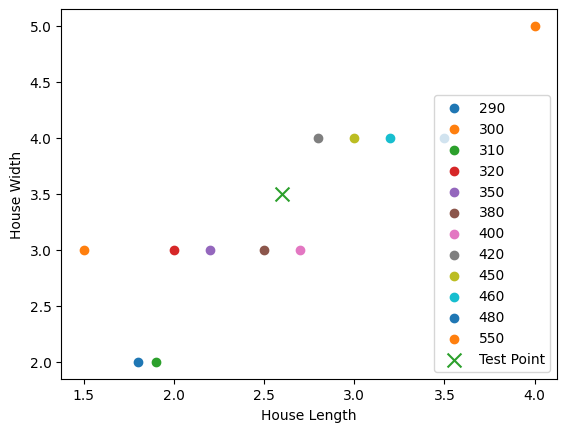

In [15]:
for label in np.unique(y_reg):
    mask = y_reg == label
    plt.scatter(X_reg[mask, 0], X_reg[mask, 1], label=label)
plt.scatter(
    new_house[0, 0],
    new_house[0, 1],
    marker='x',
    s=100,
    label='Test Point'
)
plt.xlabel("House Length")
plt.ylabel("House Width")
plt.legend()
plt.show()

In [17]:
dist = euclidean_distances(new_house,X_reg)
dist

array([[1.2083046 , 0.78102497, 1.7       , 0.64031242, 0.50990195,
        0.53851648, 1.65529454, 2.05182845, 1.02956301, 0.64031242,
        0.78102497, 0.50990195]])

In [18]:
k= 5
similar_dist = np.argsort(dist.flatten())
similar_dist

array([ 4, 11,  5,  9,  3,  1, 10,  8,  0,  6,  2,  7], dtype=int64)

In [19]:
similar_kn = similar_dist[:k]
similar_kn

array([ 4, 11,  5,  9,  3], dtype=int64)

In [20]:
y_reg[similar_kn]

array([380, 400, 420, 350, 450])

In [21]:
pd.DataFrame(y_reg[similar_kn]).mean()

0    400.0
dtype: float64

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
knn = KNeighborsRegressor()

In [24]:
knn.fit(X_reg,y_reg)

KNeighborsRegressor()

In [25]:
knn.predict(new_house)

array([400.])